## Datasets( MNIST handwritten digits without labels ) 784D

- Labels are used only for the plotting and coloring of the data

In [4]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Data Preprocessing

In [5]:
import pandas as pd

train = pd.read_csv('../Resources/mnist_train.csv')

# Dataset Lookup
print("\nShape of Data:")
print(train.shape)

print("\nHEAD :")

train.head()


Shape of Data:
(60000, 785)

HEAD :


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Splitting the data into Dataset and Label
X = train.iloc[:10000, 1:].values
y = train.iloc[:10000, 0].values

print("\nDimension of the Dataset:")
print(X.shape)
n_samples, n_features = X.shape

print("\nNumber of Samples :" + str(n_samples))
print("Feature Dimension :" + str(n_features))



Dimension of the Dataset:
(10000, 784)

Number of Samples :10000
Feature Dimension :784


Text(0.5, 1.0, 'Distribution of MNIST Images')

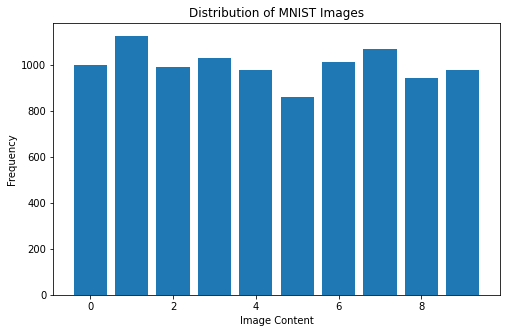

In [7]:
from collections import defaultdict

num_stats = defaultdict(int)
for num in y:
    num_stats[num] += 1
    
xAx = sorted(num_stats)
yAx = [num_stats[num] for num in xAx]

plt.figure(figsize =(8,5))
plt.bar(xAx, height=yAx)
plt.xlabel("Image Content")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images")

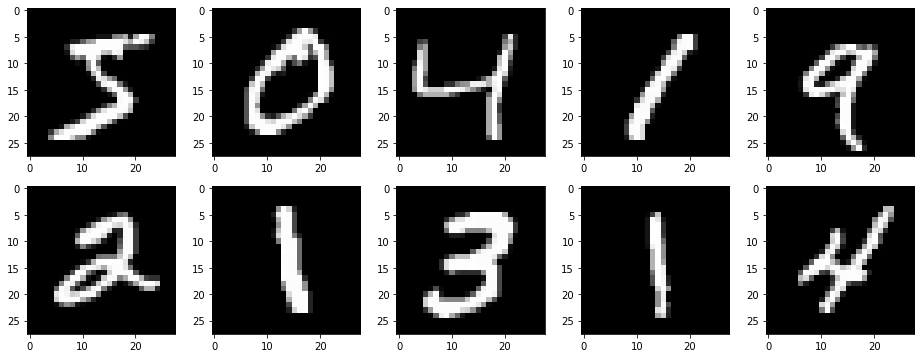

In [8]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([28,28]), cmap='gray');

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Normalization of dataset before applying PCA

Mean $(\mu)$ = 0 and Standard deviation $(\sigma)$ = 1

## Principal Component Analysis

Text(0.5, 1.0, "Single Variable's Exlained Variance")

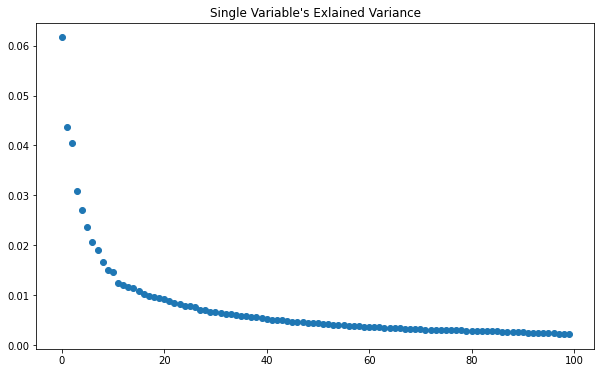

In [13]:
from sklearn.decomposition import PCA

# Determine explained variance of each variables
pca = PCA(n_components=100).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(100)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")

Text(0.5, 1.0, "Cumulative Variable's Exlained Variance")

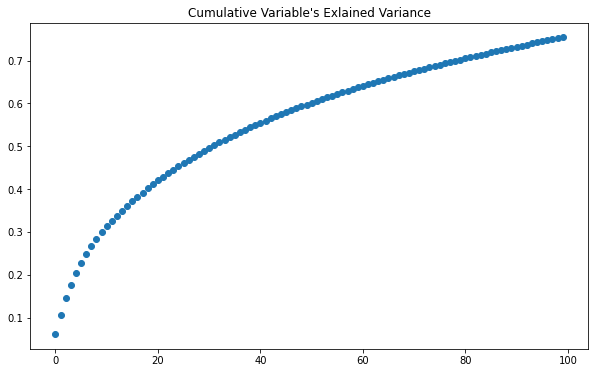

In [14]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=100).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(100)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

In [16]:
# Get top 40 PCA components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components).fit(X_std)

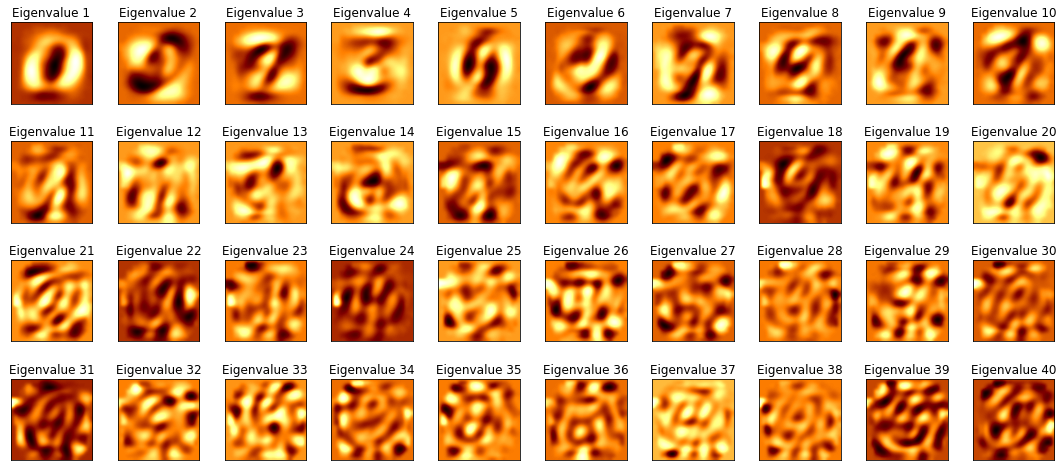

In [17]:
# Transform to images
eigen_40 = pca.components_.reshape(n_components,28, 28)

# Plot the first 40 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(40)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_40[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()


Projecting 784-dimensional data to 2D

CPU times: user 647 ms, sys: 4.09 ms, total: 651 ms
Wall time: 129 ms


Text(0.5, 1.0, 'MNIST. PCA projection')

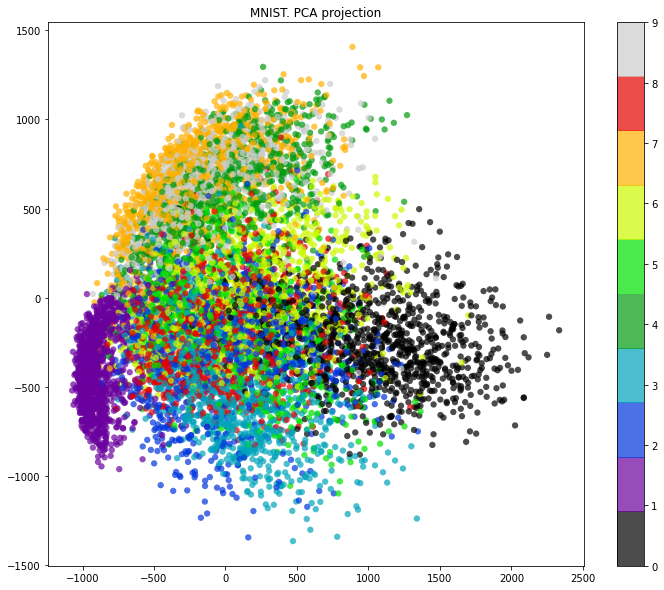

In [18]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('\nProjecting %d-dimensional data to 2D\n' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

CPU times: user 2min 47s, sys: 382 ms, total: 2min 48s
Wall time: 2min 42s


Text(0.5, 1.0, 'MNIST. ISOMAP projection')

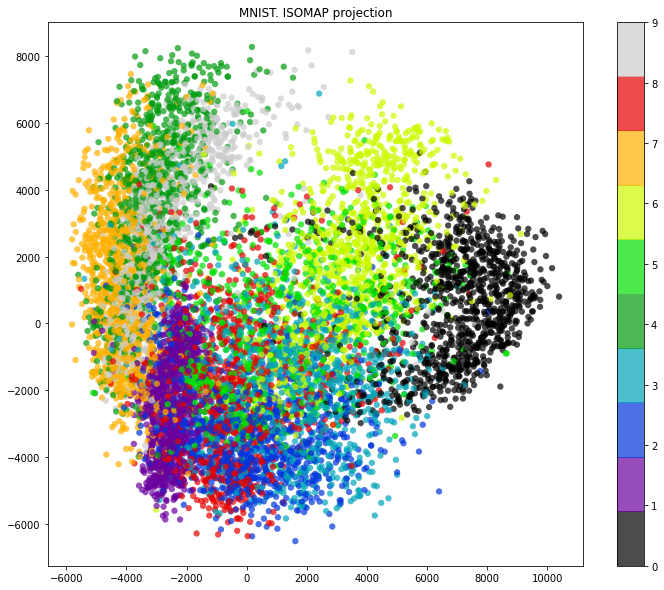

In [19]:
%%time
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)

X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. ISOMAP projection');

CPU times: user 6min 2s, sys: 2.97 s, total: 6min 5s
Wall time: 2min 12s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

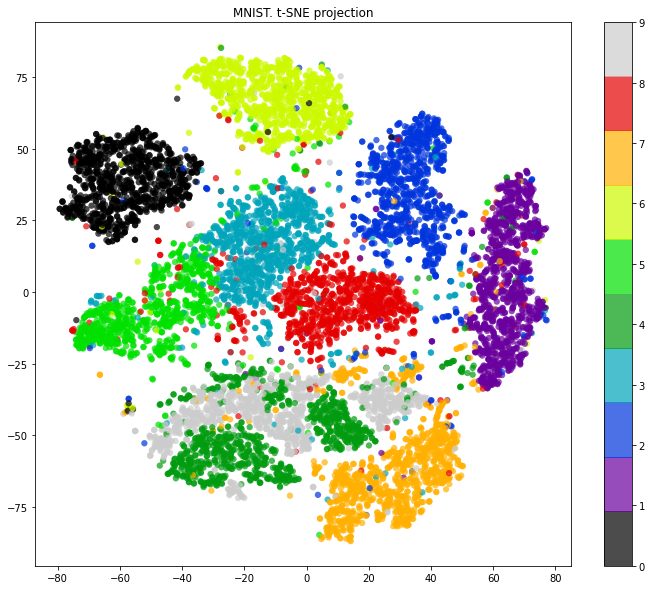

In [20]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=15)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

***
***

## Datasets( MNIST handwritten digits without labels ) 64D

In [21]:
import numpy as np
import matplotlib.pyplot as plt


Dimension of the Dataset:
(1797, 64)

Number of Samples :1797
Feature Dimension :64


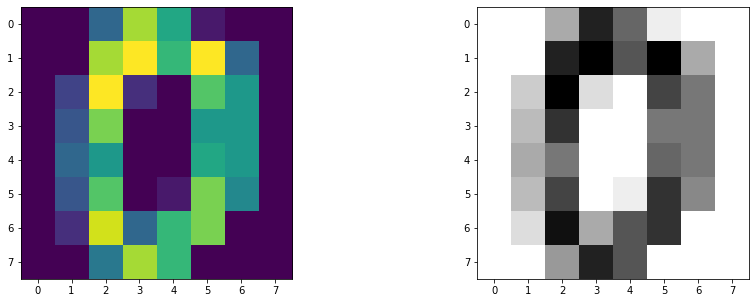

In [22]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
labels = digits.target

print("\nDimension of the Dataset:")
print(X.shape)

n_samples, n_features = X.shape

print("\nNumber of Samples :" + str(n_samples))
print("Feature Dimension :" + str(n_features))

# Let's Take a look at the First digit in the dataset
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(digits.images[0])
plt.subplot(122)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

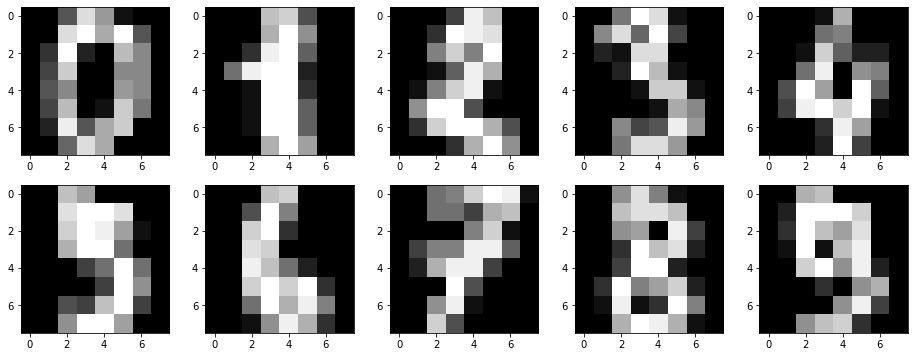

In [69]:
# Take a look at few data samples
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizing the data
X_std = StandardScaler().fit_transform(X)

# Reducing to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit(X_std).transform(X_std)

In [71]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go

# Use Plotly to plot PCA
data = [go.Scatter(
    x = X_reduced[:,0],
    y = X_reduced[:,1],
    mode = 'markers',
    showlegend = False,
    marker = dict(
        size = 8,
        color = labels,
        colorscale ='Rainbow',
        showscale = True,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='PCA')
# fig.write_html('first_figure.html', auto_open=True)

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(X, labels)

# Plot LDA graph
data = [
    go.Scatter(
    x = x_lda[:,0],
    y = x_lda[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = labels,
        colorscale ='Rainbow',
        showscale = True,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='lda_plot')

In [120]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(init='pca')
x_tsne = tsne.fit_transform(X)

# Plot TSNE graph
data = [
    go.Scatter(
    x = x_tsne[:,0],
    y = x_tsne[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = labels,
        colorscale ='Rainbow',
        showscale = True,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='TSNE_plot')

CPU times: user 53.7 s, sys: 905 ms, total: 54.6 s
Wall time: 5.39 s


In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_reduced)

kmeans_8 = kmeans.labels_

kmeans = KMeans(n_clusters=10)
# Compute cluster centers and predict cluster indices
kmeans_9 = kmeans.fit_predict(X_reduced)

data = [
    go.Scatter(
        x= X_reduced[:, 0], 
        y= X_reduced[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = labels,
            colorscale = 'Rainbow',
            showscale=True, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")